# 01_exploration.ipynb

Notebook d'exploration initiale du jeu de données Car Insurance.

# Projet : Assurance automobile
**Auteurs** : Bahir Boudouma, Youri Stecko  
**Objectif** : Construire un modèle de classification supervisée pour prédire la survenue d’un sinistre à partir de données client.


## 3. Importation des données

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv('../data/car_insurance.csv')
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## 4. Examen des données

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/car_insurance.csv')

### 🔎 Taille du DataFrame
print("\n--- Taille du DataFrame ---")
print("Taille du jeu de données :", df.shape)


### ℹ️ Types des colonnes

print("\n--- Types de données ---")
print(df.dtypes)


### ❗ Données manquantes

print("\n--- Valeurs manquantes ---")
print(df.isna().sum())



--- Taille du DataFrame ---
Taille du jeu de données : (10000, 18)

--- Types de données ---
id                       int64
age                      int64
gender                   int64
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership      float64
vehicle_year            object
married                float64
children               float64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
duis                     int64
past_accidents           int64
outcome                float64
dtype: object

--- Valeurs manquantes ---
id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_co

Visualisation des variables numériques

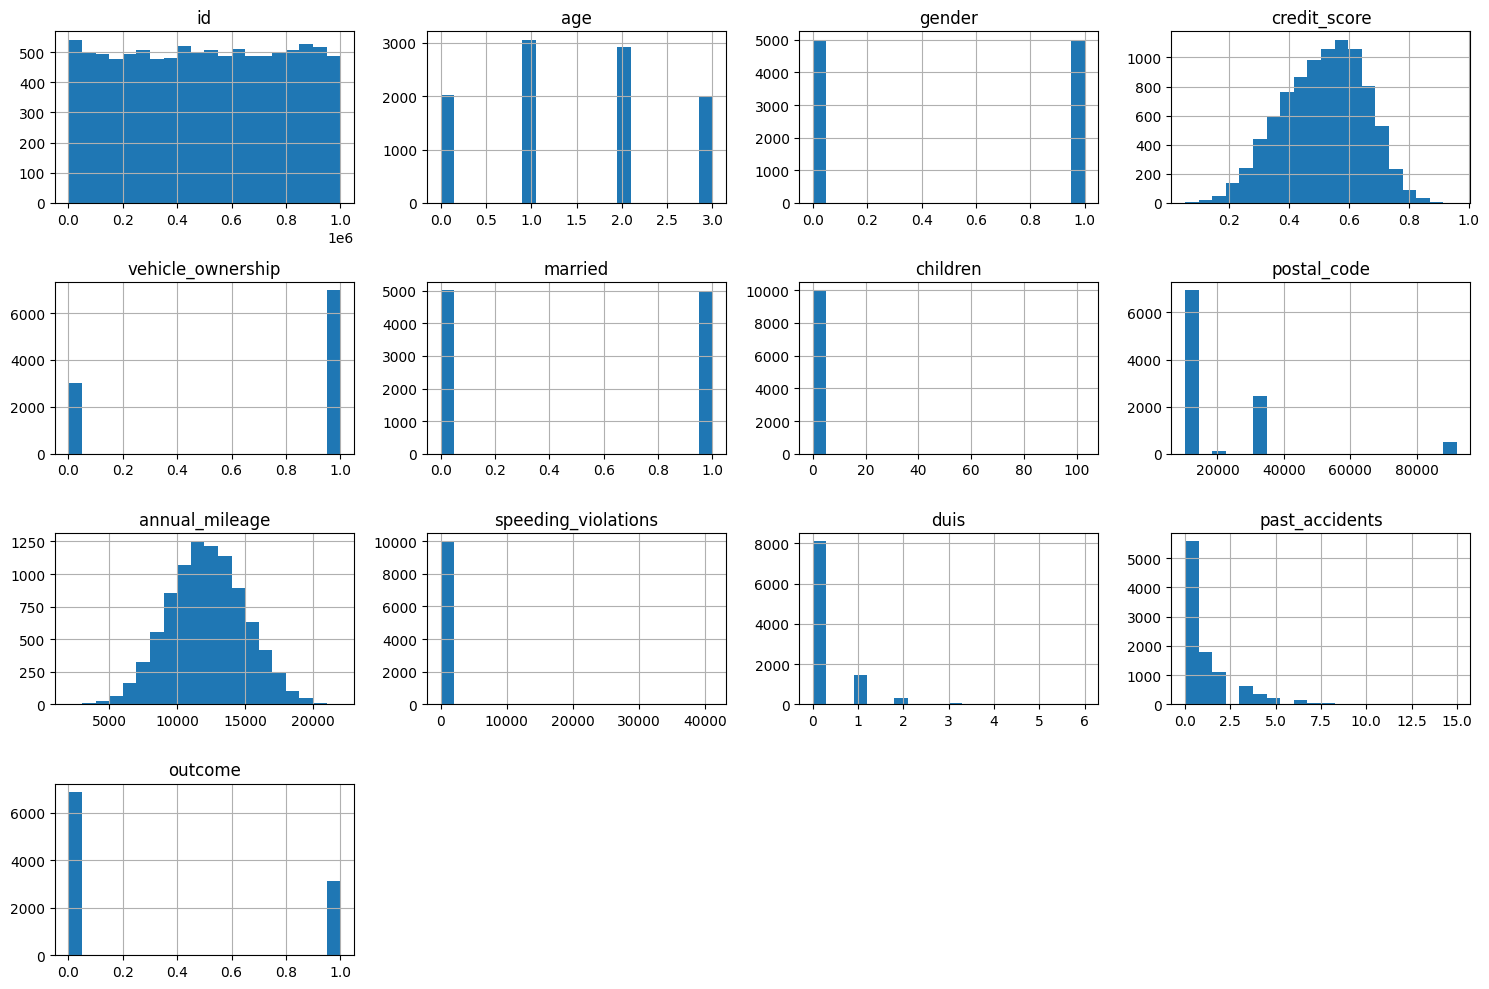

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/car_insurance.csv')

# Sélection des colonnes numériques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histogrammes
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

## 5 Preparation des données

In [24]:
# Suppression des colonnes inutiles
cols_to_drop = ['id', 'postal_code']
df.drop(columns=cols_to_drop, inplace=True)


# Remplir les valeurs manquantes numériques par la médiane
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if df[col].isna().sum() > 0:
        median = df[col].median()
        df[col] = df[col].fillna(median)

# Remplir les valeurs manquantes catégorielles par la valeur la plus fréquente
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isna().sum() > 0:
        mode = df[col].mode()[0]
        df[col] = df[col].fillna(mode)


### Traitement des données aberrantes

# suppression des valeurs aberrantes sur 'children' (>= 20 considérés comme aberrants)
df = df[df['children'] < 20]

# suppression des valeurs extrêmes sur 'speeding_violations' (arbitrairement > 100)
df = df[df['speeding_violations'] < 100]


### 🔢 Transformation des variables qualitatives

from sklearn.preprocessing import LabelEncoder

# Transformation des variables catégorielles en numériques

le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

### ️ Normalisation des données

from sklearn.preprocessing import StandardScaler

# Normalisation des données numériques
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [25]:
print("\n--- Vérification des valeurs manquantes ---")
print(df.isna().sum())

###  Vérification des types de données après transformation

print("\n--- Types de données après transformation ---")
print(df.dtypes)


### Aperçu des données préparées

print("\n--- Aperçu des données préparées ---")
print(df.head())


### Statistiques descriptives

print("\n--- Statistiques descriptives ---")
print(df.describe())




--- Vérification des valeurs manquantes ---
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

--- Types de données après transformation ---
age                    float64
gender                 float64
driving_experience       int64
education                int64
income                   int64
credit_score           float64
vehicle_ownership      float64
vehicle_year             int64
married                float64
children               float64
annual_mileage         float64
vehicle_type             int64
speeding_violations    float64
duis                   float64
past_accidents         float64
outcome                float64

## 6. Recherche de corrélations

C:\Users\steck\AppData\Local\Temp\ipykernel_17476\2315642623.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
C:\Users\steck\AppData\Local\Temp\ipykernel_17476\2315642623.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

=== Corrélations avec 'outcome' ===
vehicle_year           0.293819
annual_mileage         0.177704
gender                 0.107486
vehicle_type           0.005793
income                -0.047268
education             -0.092260
duis                  -0.189174
children              -0.232350
married               -0.262099
speeding_violations   -0.291619
credit_score          -0.307999
past_accidents        -0.311283
vehicle_ownership     -0.378315
age                   -0.448087
driving_experience    -0.497005
Name: outcome, dtype: float64

=== Paires d’entrées |r| > 0.5 ===
age ↔ driving_experience : r = 0.71
driving_experience ↔ speeding_violations : r = 0.64
driving_experience ↔ past_accidents : r = 0.60


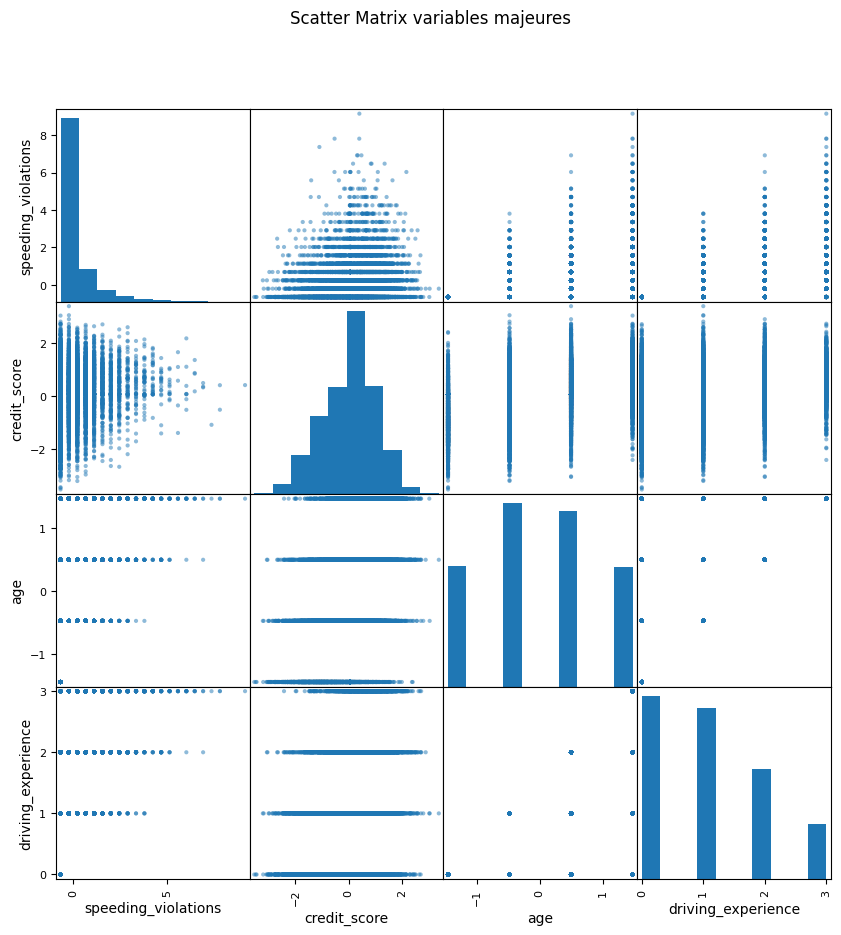

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1) Chargement et pré‑traitement (reprends ton code de l’étape 5)
df = pd.read_csv('../data/car_insurance.csv')
df.drop(columns=['id','postal_code'], inplace=True)
# imputation
num_cols = df.select_dtypes(include=['int64','float64']).columns
for c in num_cols:
    df[c].fillna(df[c].median(), inplace=True)
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    df[c].fillna(df[c].mode()[0], inplace=True)
# aberrations
df = df[df['children'] < 20]
df = df[df['speeding_violations'] < 100]
# encodage
le = LabelEncoder()
for c in cat_cols:
    df[c] = le.fit_transform(df[c])
# normalisation
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 2) Calcul de la matrice de corrélation
corr = df.corr()

# 3) Afficher la corrélation de chaque variable avec la sortie 'outcome'
print("=== Corrélations avec 'outcome' ===")
print(corr['outcome'].drop('outcome').sort_values(ascending=False))

# 4) Lister les paires d’entrées fortement liées entre elles (|r|>0.5)
print("\n=== Paires d’entrées |r| > 0.5 ===")
for i, a in enumerate(df.columns):
    for b in df.columns[i+1:]:
        r = corr.loc[a, b]
        if abs(r) > 0.5 and a!='outcome' and b!='outcome':
            print(f"{a} ↔ {b} : r = {r:.2f}")

# 5) Scatter matrix des variables-clés
features = ['speeding_violations','credit_score','age','driving_experience']
scatter_matrix(df[features], figsize=(10,10), diagonal='hist')
plt.suptitle("Scatter Matrix variables majeures")
plt.show()


## 7. Extraction des jeux d'apprentissage et de test


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# —————————————————————————————
# 1) Chargement et pré‑traitement (reprend ton code de l’étape 5)
# —————————————————————————————
df = pd.read_csv('../data/car_insurance.csv')
df.drop(columns=['id','postal_code'], inplace=True)

# Imputation des manquantes
num_cols = df.select_dtypes(include=['int64','float64']).columns
for c in num_cols:
    df[c].fillna(df[c].median(), inplace=True)
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    df[c].fillna(df[c].mode()[0], inplace=True)

# Suppression des aberrations
df = df[df['children'] < 20]
df = df[df['speeding_violations'] < 100]

# Encodage et normalisation
le = LabelEncoder()
for c in cat_cols:
    df[c] = le.fit_transform(df[c])
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# —————————————————————————————
# 2) Définition de X et y (NumPy arrays)
# —————————————————————————————
# On sélectionne les variables retenues pour la classification
features = [
    'driving_experience',
    'vehicle_ownership',
    'past_accidents',
    'credit_score',
    'speeding_violations'
]
X = df[features].values        # shape (n_samples, n_features)
y = df['outcome'].values       # shape (n_samples,)

# —————————————————————————————
# 3) Split train / test
# —————————————————————————————
# Ici on réserve 20% des données pour le test, et on stratifie selon y
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,        # 20% en test
    random_state=42,        # pour la reproductibilité
    stratify=y              # conserve la même répartition des classes
)

# Vérification des tailles
print(f"Nombre total d’échantillons : {len(X)}")
print(f"→ Jeu d’apprentissage : {len(X_train)} échantillons ({len(X_train)/len(X):.0%})")
print(f"→ Jeu de test        : {len(X_test)} échantillons ({len(X_test)/len(X):.0%})")


Nombre total d’échantillons : 9992
→ Jeu d’apprentissage : 7993 échantillons (80%)
→ Jeu de test        : 1999 échantillons (20%)


C:\Users\steck\AppData\Local\Temp\ipykernel_17476\180347949.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
C:\Users\steck\AppData\Local\Temp\ipykernel_17476\180347949.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

## 8. Entraînement d'un modèle


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# 1) Chargement et pré‑traitement
df = pd.read_csv('../data/car_insurance.csv')
df.drop(columns=['id','postal_code'], inplace=True)

# Imputation des manquantes
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('outcome')
for c in num_cols:
    df[c].fillna(df[c].median(), inplace=True)
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    df[c].fillna(df[c].mode()[0], inplace=True)

# Suppression des valeurs aberrantes
df = df[df['children'] < 20]
df = df[df['speeding_violations'] < 100]

# Encodage catégoriel
le = LabelEncoder()
for c in cat_cols:
    df[c] = le.fit_transform(df[c])

# 2) Séparation de X et y
features = [
    'driving_experience',
    'vehicle_ownership',
    'past_accidents',
    'credit_score',
    'speeding_violations'
]
X = df[features].values               # tableau NumPy des features
y = df['outcome'].values.astype(int)  # étiquettes {0,1} en int

# 3) Normalisation uniquement de X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4) Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# 5) Entraînement et évaluation
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

print(f"Precision train : {model.score(X_train, y_train):.3f}")
print(f"Precision test  : {model.score(X_test, y_test):.3f}")




Precision train : 0.799
Precision test  : 0.806


C:\Users\steck\AppData\Local\Temp\ipykernel_17476\3413793341.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
C:\Users\steck\AppData\Local\Temp\ipykernel_17476\3413793341.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

## 9. Evaluation du modèle


In [30]:
# 1) Prédictions sur train et test
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# 2) Affichage échantillon par échantillon (sur le jeu de test)
print("Predictions vs. réalité (jeu de test) :")
for i, (pred, vrai) in enumerate(zip(y_pred_test, y_test)):
    print(f"Éch. {i:3d} – Prédit : {pred} / Réel : {vrai}")

# 3) Calcul des métriques (si vous ne l’avez pas déjà fait)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

print("\n--- Évaluation sur le jeu de test ---")
print("Accuracy :         ", accuracy_score(y_test, y_pred_test))
print("Matrice de conf. :\n", confusion_matrix(y_test, y_pred_test))
print("Précision (precision) : ", precision_score(y_test, y_pred_test))
print("Rappel (recall) :       ", recall_score(y_test, y_pred_test))
print("F1-score :              ", f1_score(y_test, y_pred_test))



Predictions vs. réalité (jeu de test) :
Éch.   0 – Prédit : 0 / Réel : 0
Éch.   1 – Prédit : 0 / Réel : 0
Éch.   2 – Prédit : 0 / Réel : 1
Éch.   3 – Prédit : 0 / Réel : 0
Éch.   4 – Prédit : 0 / Réel : 0
Éch.   5 – Prédit : 0 / Réel : 0
Éch.   6 – Prédit : 0 / Réel : 0
Éch.   7 – Prédit : 0 / Réel : 0
Éch.   8 – Prédit : 0 / Réel : 0
Éch.   9 – Prédit : 0 / Réel : 0
Éch.  10 – Prédit : 0 / Réel : 0
Éch.  11 – Prédit : 1 / Réel : 1
Éch.  12 – Prédit : 0 / Réel : 0
Éch.  13 – Prédit : 0 / Réel : 0
Éch.  14 – Prédit : 0 / Réel : 1
Éch.  15 – Prédit : 0 / Réel : 0
Éch.  16 – Prédit : 0 / Réel : 1
Éch.  17 – Prédit : 0 / Réel : 1
Éch.  18 – Prédit : 0 / Réel : 0
Éch.  19 – Prédit : 0 / Réel : 1
Éch.  20 – Prédit : 0 / Réel : 0
Éch.  21 – Prédit : 0 / Réel : 0
Éch.  22 – Prédit : 0 / Réel : 0
Éch.  23 – Prédit : 1 / Réel : 1
Éch.  24 – Prédit : 0 / Réel : 1
Éch.  25 – Prédit : 0 / Réel : 0
Éch.  26 – Prédit : 0 / Réel : 0
Éch.  27 – Prédit : 0 / Réel : 0
Éch.  28 – Prédit : 0 / Réel : 0
Éch

## 10. Amélioration de l'évaluation


In [31]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ——— 1) Préparation des données (mêmes que précédemment) ———
df = pd.read_csv('../data/car_insurance.csv')
df.drop(columns=['id','postal_code'], inplace=True)

# Imputation
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('outcome')
for c in num_cols:
    df[c].fillna(df[c].median(), inplace=True)
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    df[c].fillna(df[c].mode()[0], inplace=True)

# Suppression des aberrations
df = df[df['children'] < 20]
df = df[df['speeding_violations'] < 100]

# Encodage et séparation X/y
le = LabelEncoder()
for c in cat_cols:
    df[c] = le.fit_transform(df[c])

features = ['driving_experience','vehicle_ownership','past_accidents','credit_score','speeding_violations']
X = df[features].values
y = df['outcome'].values.astype(int)

# Normalisation de X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ——— 2) Configuration de la validation croisée ———
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ——— 3) Cross‐val_score ———
model = LogisticRegression(random_state=42, max_iter=1000)
scores = cross_val_score(
    model,
    X,
    y,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

print("Scores d'accuracy pour chaque pli :", scores)
print(f"→ Mean accuracy : {scores.mean():.3f}")
print(f"→ Std accuracy  : {scores.std():.3f}")



C:\Users\steck\AppData\Local\Temp\ipykernel_17476\1675148503.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
C:\Users\steck\AppData\Local\Temp\ipykernel_17476\1675148503.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Scores d'accuracy pour chaque pli : [0.79789895 0.79389695 0.80880881 0.80530531 0.78728729]
→ Mean accuracy : 0.799
→ Std accuracy  : 0.008


## 11. Comparaison avec d'autres algorithmes


In [32]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# — On suppose X_train, X_test, y_train, y_test déjà définis —

# 1) Choix des classifieurs à comparer
classifiers = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "Perceptron":        Perceptron(random_state=42, max_iter=1000),
    "KNN (k=5)":         KNeighborsClassifier(n_neighbors=5)
}

# 2) Configuration de la CV à 5 plis stratifiés
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3) Boucle d'entraînement / évaluation
for name, clf in classifiers.items():
    # a) Entraînement sur le jeu complet d'entraînement
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc  = clf.score(X_test,  y_test)

    # b) Validation croisée sur X_train
    cv_scores = cross_val_score(clf, X_train, y_train,
                                cv=cv, scoring="accuracy", n_jobs=-1)

    # c) Affichage des résultats
    print(f"=== {name} ===")
    print(f"Train accuracy : {train_acc:.3f}")
    print(f"Test  accuracy : {test_acc:.3f}")
    print(f"CV   accuracy : {cv_scores.mean():.3f} ± {cv_scores.std():.3f}\n")







=== LogisticRegression ===
Train accuracy : 0.799
Test  accuracy : 0.806
CV   accuracy : 0.798 ± 0.008

=== Perceptron ===
Train accuracy : 0.763
Test  accuracy : 0.754
CV   accuracy : 0.713 ± 0.050

=== KNN (k=5) ===
Train accuracy : 0.839
Test  accuracy : 0.779
CV   accuracy : 0.779 ± 0.007



## 12. Sauvegarde du modèle entraîné


In [50]:
import pickle
from sklearn.linear_model import LogisticRegression

# --- 1) Entraînement (supposons que `model`, `X_test`, `y_test` existent déjà) ---
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# --- 2) Sauvegarde du modèle ---
# pickle.dump(obj, file, protocol=None, *, fix_imports=True)
#   • obj         : l’objet Python à sérialiser (ici `model`)
#   • file        : fichier ouvert en mode binaire écriture ('wb')
#   • protocol    : version du format Pickle (None choisit la version la plus récente)
#   • fix_imports : compatibilité Python 2 (laisser True)
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

# --- 3) Chargement du modèle ---
# pickle.load(file, *, fix_imports=True, encoding="ASCII", errors="strict")
#   • file     : fichier ouvert en mode binaire lecture ('rb')
#   • fix_imports, encoding, errors : options surtout pour la compat Python 2→3
with open('logistic_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# --- 4) Vérification que le modèle rechargé prédit de la même façon ---
y_pred = loaded_model.predict(X_test)
print("Accuracy rechargée :", (y_pred == y_test).mean())






Accuracy rechargée : 0.8064032016008004
